In [1]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. 국가별 GDP

world bank에서 GDP 정보를 찾습니다.

In [2]:
from pandas_datareader import wb

In [3]:
wb.search('gdp.*current')

,id,name,unit,source,sourceNote,sourceOrganization,topics
713,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
10171,NA.GDP.ACC.FB.SNA08.CR,GDP on Accommodation & Food Beverages Activity...,,Indonesia Database for Policy and Economic Res...,,b'',
10173,NA.GDP.AGR.CR,"GDP on Agriculture Sector (in IDR Million), Cu...",,Indonesia Database for Policy and Economic Res...,,b'BADAN PUSAT STATISTIK - Statistics Indonesia',
10175,NA.GDP.AGR.SNA08.CR,"GDP on Agriculture, Forestry & Fisheries Secto...",,Indonesia Database for Policy and Economic Res...,,b'',
10177,NA.GDP.BUSS.SNA08.CR,GDP on Business Services Sector (in IDR Millio...,,Indonesia Database for Policy and Economic Res...,,b'',
10179,NA.GDP.CNST.CR,"GDP on Construction Sector (in IDR Million), C...",,Indonesia Database for Policy and Economic Res...,Construction is an economic activity which pro...,b'BADAN PUSAT STATISTIK - Statistics Indonesia',
10181,NA.GDP.CNST.SNA08.CR,"GDP on Construction Sector (in IDR Million), S...",,Indonesia Database for Policy and Economic Res...,,b'',
10183,NA.GDP.EDUS.SNA08.CR,GDP on Education Services Sector (in IDR Milli...,,Indonesia Database for Policy and Economic Res...,,b'',
10185,NA.GDP.ELEC.GAS.SNA08.CR,GDP on Electricity & Gas Supply Sector (in IDR...,,Indonesia Database for Policy and Economic Res...,,b'',
10187,NA.GDP.EXC.OG.CR,Total GDP excluding Oil and Gas (in IDR Millio...,,Indonesia Database for Policy and Economic Res...,,b'BADAN PUSAT STATISTIK - Statistics Indonesia',


* pandas_datareader 페이지에서 Wolrd bank로 이동하여 Indicator를 찾습니다.

* 주소표시줄 상단에 보면 Indicator를 확인할 수 있습니다.

* 국가는 ISO code로 넣습니다.

In [4]:
data = wb.download(indicator="NY.GDP.MKTP.CD", country=['KOR','JPN'], start=2016, end=2020)

In [5]:
data.head()

NY.GDP.MKTP.CD
country year                
Japan   2020    5.040108e+12
        2019    5.123318e+12
        2018    5.037835e+12
        2017    4.930837e+12
        2016    5.003678e+12

In [6]:
temp = data.reset_index(drop=False)

In [7]:
temp.head()

,country,year,NY.GDP.MKTP.CD
0,Japan,2020,5.040108e+12
1,Japan,2019,5.123318e+12
2,Japan,2018,5.037835e+12
3,Japan,2017,4.930837e+12
4,Japan,2016,5.003678e+12


In [8]:
temp['year'] = temp['year'].astype(int)

In [9]:
temp = temp.set_index('year')

country
Japan          AxesSubplot(0.125,0.125;0.775x0.755)
Korea, Rep.    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NY.GDP.MKTP.CD, dtype: object

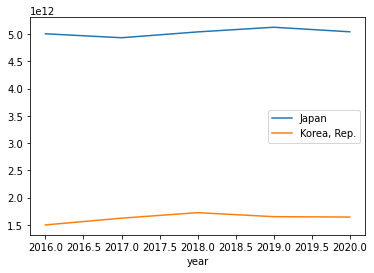

In [10]:
temp.groupby('country')['NY.GDP.MKTP.CD'].plot(legend=True)

## 1인당 국민소득

In [11]:
data = wb.download(indicator='NY.GDP.PCAP.PP.KD', country=['KOR', 'JPN'], start=2016, end=2020)

In [12]:
temp = data.reset_index(drop=False)
temp.head()

,country,year,NY.GDP.PCAP.PP.KD
0,Japan,2020,39935.464722
1,Japan,2019,41697.411939
2,Japan,2018,41739.203321
3,Japan,2017,41444.215744
4,Japan,2016,40727.968877


country
Japan          AxesSubplot(0.125,0.125;0.775x0.755)
Korea, Rep.    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NY.GDP.PCAP.PP.KD, dtype: object

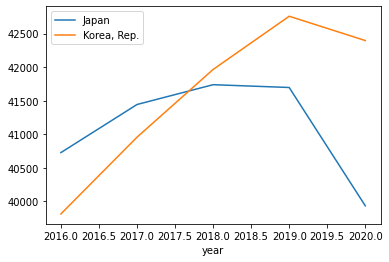

In [13]:
temp['year'] = temp['year'].astype(int)
temp = temp.set_index('year')
temp.groupby('country')['NY.GDP.PCAP.PP.KD'].plot(legend=True)

## 2.인구수 데이터 수집하기

인구수는 Econdb에서 가져와 봅니다.

In [14]:
import os
import pandas_datareader.data as web

f = web.DataReader('ticker=POPKR', 'econdb')
f.head()

By variant,Medium
By the structure of population and dependency ratio,Total population(person)
None,None
TIME_PERIOD,
2018-01-01,51585056
2019-01-01,51764824
2020-01-01,51836240
2021-01-01,51744876


In [15]:
kor = web.DataReader('ticker=POPKR', 'econdb')
jpn = web.DataReader('ticker=POPJP', 'econdb')

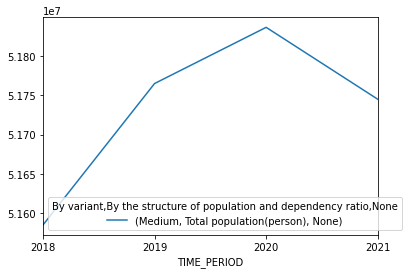

In [16]:
kor.plot()

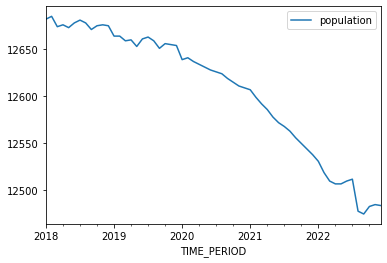

In [17]:
jpn.columns = ['population']
jpn.plot()